In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

import nn.layers as layers
import nn.optim as optim
import nn.net as net
from nn.solver import Solver
from utils import *
from dataset import get_CIFAR10_data

# Fully-conneceted (Linear) layer
`nn/layers.py` 파일 내부에 있는 `Linear` 클래스의 `forward`와 `backward` 메소드를 주석에 명시된 요구 조건에 따라 작성하고, 아래 코드를 실행시켜 구현한 코드를 테스트한다.<br>
**NOTE**: 모든 테스트 결과는 *1e-06* 이하의 오차만 허용된다.

In [23]:
# Test the Linear.forward()
num_input, in_dims, out_dims = 3, 5, 3

linear = layers.Linear(in_dims, out_dims, init_mode="linear")
x = np.linspace(-0.1, 0.5, num=num_input*in_dims).reshape(num_input, in_dims)

out = linear.forward(x)
correct_out = np.array([[ 0.01938776,  0.01836735,  0.01734694],
                        [ 0.00408163,  0.01836735,  0.03265306],
                        [-0.01122449,  0.01836735,  0.04795918],])
print("Testing linear - forward function:")
print("error:", rel_error(out, correct_out))

Testing linear - forward function:
error: 3.2500010554504164e-07


In [24]:
# Test the Linear.backward()
num_input, in_dims, out_dims = 10, 6, 5

linear = layers.Linear(in_dims, out_dims, init_mode="normal")
x = np.linspace(-0.1, 0.5, num=num_input*in_dims).reshape(num_input, in_dims)
dout = np.random.randn(num_input, out_dims)

dx_num = eval_numerical_gradient_array(lambda x: linear.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: linear.forward(x), linear.params["w"], dout)
db_num = eval_numerical_gradient_array(lambda b: linear.forward(x), linear.params["b"], dout)

out = linear.forward(x)
linear.backward(dout)

dx, dw, db = linear.grads["x"], linear.grads["w"], linear.grads["b"]

print("Testing linear - backward function:")
print("dx error:", rel_error(dx, dx_num))
print("dw error:", rel_error(dw, dw_num))
print("db error:", rel_error(db, db_num))

Testing linear - backward function:
dx error: 2.8886365437909415e-11
dw error: 2.7884321228127636e-14
db error: 1.02716862064981e-15


# Activation functions
`nn/layers.py` 파일 내부에 있는 `ReLU`, `Sigmoid`, `Tanh` 클래스의 `forward` 및 `backward` 메소드를 주석에 명시된 요구 조건에 따라 작성하고, 아래 코드를 실행시켜 구현한 코드를 테스트한다.<br>
**NOTE**: 모든 테스트 결과는 *1e-06* 이하의 오차만 허용된다.

In [25]:
# Test the ReLU.forward()
relu = layers.ReLU()
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out = relu.forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

print("Testing ReLU - forward function:")
print("error:", rel_error(out, correct_out))

# Test the ReLU.backward()
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)
dx_num = eval_numerical_gradient_array(lambda x: relu.forward(x), x, dout)

relu.forward(x)
dx = relu.backward(dout)

print("\nTesting ReLU - backward function:")
print("dx error:", rel_error(dx, dx_num))

Testing ReLU - forward function:
error: 4.999999798022158e-08

Testing ReLU - backward function:
dx error: 3.2756205690324114e-12


In [26]:
# Test the Sigmoid.forward()
sigmoid = layers.Sigmoid()
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out = sigmoid.forward(x)
correct_out = np.array([[0.37754067, 0.39913012, 0.42111892, 0.44342513],
                        [0.46596182, 0.48863832, 0.51136168, 0.53403818],
                        [0.55657487, 0.57888108, 0.60086988, 0.62245933],])

print("Testing Sigmoid - forward function:")
print("error:", rel_error(out, correct_out))

# Test the Sigmoid.backward()
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid.forward(x), x, dout)

sigmoid.forward(x)
dx = sigmoid.backward(dout)

print("\nTesting Sigmoid - backward function:")
print("dx error:", rel_error(dx, dx_num))

Testing Sigmoid - forward function:
error: 5.157221295671855e-09

Testing Sigmoid - backward function:
dx error: 2.151996909868145e-11


In [27]:
# Test the Tanh.forward()
tanh = layers.Tanh()
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out = tanh.forward(x)
correct_out = np.array([[-0.46211716, -0.38770051, -0.30786199, -0.22343882],
                        [-0.13552465, -0.04542327,  0.04542327,  0.13552465],
                        [ 0.22343882,  0.30786199,  0.38770051,  0.46211716],])

print("Testing Tanh - forward function:")
print("error:", rel_error(out, correct_out))

# Test the Tanh.backward()
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: tanh.forward(x), x, dout)

tanh.forward(x)
dx = tanh.backward(dout)

print("\nTesting Tanh - backward function:")
print("dx error:", rel_error(dx, dx_num))

Testing Tanh - forward function:
error: 3.829228808681821e-08

Testing Tanh - backward function:
dx error: 4.955931672378307e-10


# Loss layer: Softmax-CrossEntropy
`nn/layers.py` 파일 내부에 있는 `SoftmaxCELoss` 클래스의 `forward` 메소드를 주석에 명시된 요구 조건에 따라 작성하고, 아래 코드를 실행시켜 구현한 코드를 테스트한다.<br>
주의: 구현의 편의성을 위해 별도의 `backward` 메소드 없이 `forward` 함수 내부에서 loss와 gradient를 계산하도록 되어있다.<br>
**NOTE**: 모든 테스트 결과는 *1e-06* 이하의 오차만 허용된다.

In [28]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

ce = layers.SoftmaxCELoss()

dx_num = eval_numerical_gradient(lambda x: ce.forward(x, y)[0], x, verbose=False)
loss, dx = ce.forward(x, y)

print("Testing softmax loss:")
print("loss:", loss, " (must be around 2.3)")
print("dx error:", rel_error(dx, dx_num))

Testing softmax loss:
loss: 2.3027738622733382  (must be around 2.3)
dx error: 1.1199483964429371e-08


# Two-layer Network
이전까지 구현한 모듈들을 조합하여 레이어 2개짜리 네트워크를 작성한다. `nn/net.py` 파일에 있는 `TwoLayerNet` 클래스의 생성자 및 `loss` 함수를 구현한 뒤, 아래 코드를 실행하여 테스트 한다.<br>
**NOTE**: 모든 테스트 결과는 *1e-06* 이하의 오차만 허용된다.

In [29]:
N, D, H, C = 3, 5, 50, 7
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
y = np.asarray([0, 5, 1])

mynet = net.TwoLayerNet(D, H, C)
mynet.modules["linear1"].params["w"] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
mynet.modules["linear1"].params["b"] = np.linspace(-0.1, 0.9, num=H)
mynet.modules["linear2"].params["w"] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
mynet.modules["linear2"].params["b"] = np.linspace(-0.9, 0.1, num=C)

scores = mynet.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
correct_loss = 3.4702243556

print("Testing TwoLayerNet:")
print("score error:", np.abs(scores - correct_scores).sum())

loss = mynet.loss(X, y)
print("loss error:", np.abs(loss - correct_loss))

loss = mynet.loss(X, y)
f = lambda _: mynet.loss(X, y)
grad_w2 = eval_numerical_gradient(f, mynet.modules["linear2"].params["w"], verbose=False)
grad_b2 = eval_numerical_gradient(f, mynet.modules["linear2"].params["b"], verbose=False)
grad_w1 = eval_numerical_gradient(f, mynet.modules["linear1"].params["w"], verbose=False)
grad_b1 = eval_numerical_gradient(f, mynet.modules["linear1"].params["b"], verbose=False)

print()
print("grad_w2 error:", rel_error(grad_w2, mynet.modules["linear2"].grads["w"]))
print("grad_b2 error:", rel_error(grad_b2, mynet.modules["linear2"].grads["b"]))
print("grad_w1 error:", rel_error(grad_w1, mynet.modules["linear1"].grads["w"]))
print("grad_b1 error:", rel_error(grad_b1, mynet.modules["linear1"].grads["b"]))

Testing TwoLayerNet:
score error: 5.115852452775016e-08
loss error: 4.61053417666335e-12

grad_w2 error: 9.866878677238034e-07
grad_b2 error: 3.077017844133118e-08
grad_w1 error: 1.442954490616291e-08
grad_b1 error: 1.522411424763173e-08


# Solver and train the network
위에서 작성한 2-레이어 네트워크를 학습한다. 네트워크의 학습을 CIFAR-10 데이터를 사용하여 (`dataset.py` 참조), `nn.Solver` 파일의 `Solver` 클래스에 의해 학습이 진행된다. 대부분의 코드가 미리 작성되었기 때문에  `nn.Solver` 파일의 클래스의 API를 참조하여 아래 **TODO** 부분을 작성한다. **TODO** 부분은 네트워크 하이퍼파라미터 세팅에 관한 코드가 들어가야 하며, validation set에 대해 **50%** 이상의 성능을 보여야 한다.

In [4]:
# Load the (preprocessed) CIFAR10 data.
data = get_CIFAR10_data()
for k, v in data.items():
    print(k, v.shape)

X_train (49000, 3, 32, 32)
y_train (49000,)
X_val (1000, 3, 32, 32)
y_val (1000,)
X_test (1000, 3, 32, 32)
y_test (1000,)


Epoch 0/10
  Loss: 2.303
  Train accuracy: 0.095
  Val accuracy: 0.105
Epoch 1/10
  Loss: 1.654
  Train accuracy: 0.348
  Val accuracy: 0.389
Epoch 2/10
  Loss: 1.053
  Train accuracy: 0.445
  Val accuracy: 0.450
Epoch 3/10
  Loss: 1.820
  Train accuracy: 0.496
  Val accuracy: 0.481
Epoch 4/10
  Loss: 1.191
  Train accuracy: 0.513
  Val accuracy: 0.496
Epoch 5/10
  Loss: 1.262
  Train accuracy: 0.494
  Val accuracy: 0.493
Epoch 6/10
  Loss: 1.466
  Train accuracy: 0.547
  Val accuracy: 0.507
Epoch 7/10
  Loss: 0.643
  Train accuracy: 0.531
  Val accuracy: 0.515
Epoch 8/10
  Loss: 0.895
  Train accuracy: 0.555
  Val accuracy: 0.521
Epoch 9/10
  Loss: 1.019
  Train accuracy: 0.590
  Val accuracy: 0.526
Epoch 10/10
  Loss: 0.815
  Train accuracy: 0.588
  Val accuracy: 0.532


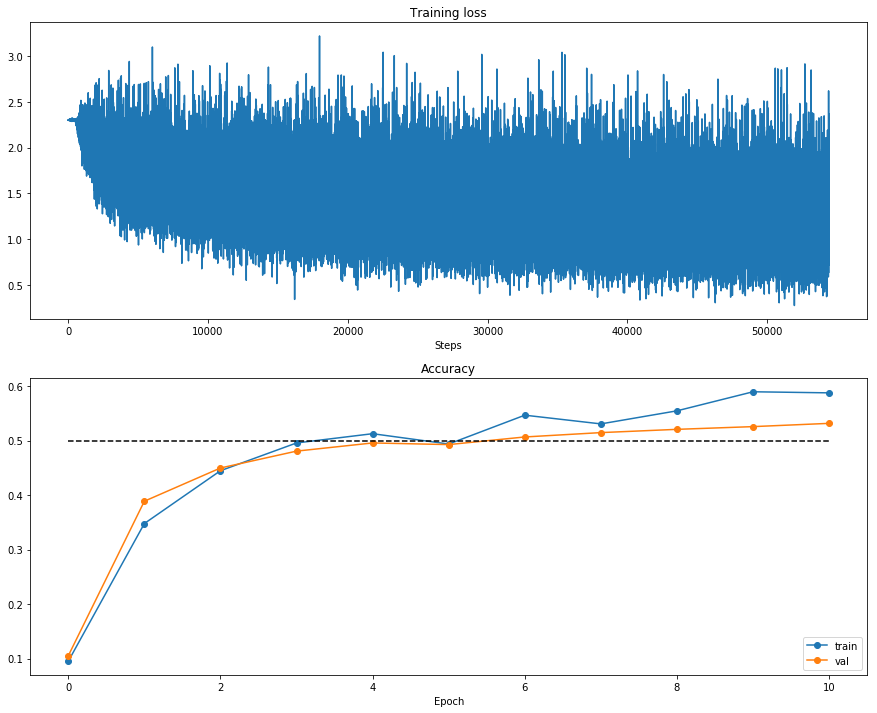

In [5]:
model = net.TwoLayerNet(init_mode="normal", init_scale=0.001)
solver = None

######################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves   #
# at least **50%** accuracy on the validation set.                   #
######################################################################
solver = Solver(
                model, 
                data,
                optim_config={
                    'lr':0.01,
                },
                lr_decay=0.95,
                num_epochs=10, 
                batch_size=9)
######################################################################
#                          END OF YOUR CODE                          #
######################################################################
solver.train()

# plot results
plt.subplot(2, 1, 1)
plt.title("Training loss")
plt.plot(solver.loss_history, "-")
plt.xlabel("Steps")

plt.subplot(2, 1, 2)
plt.title("Accuracy")
plt.plot(solver.train_acc_history, "-o", label="train")
plt.plot(solver.val_acc_history, "-o", label="val")
plt.plot([0.5] * len(solver.val_acc_history), "k--")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multi-layer network
이제 `nn/net.py`의 `FCNet` 클래스의 빈칸을 작성하여, 레이어가 여러 개인 네트워크를 디자인한다. 이 때, 임의의 레이어 개수를 입력으로 받도록 for loop를 사용해서 네트워크를 구성하고 forward/backward 연산을 수행해야만 한다. 그 후, 네트워크를 테스트하고 (numerical 이슈에 의해 상대 오차가 비교적 클 가능성이 있으므로, 테스트 코드를 반복 실행하여 바뀌는 오차를 확인한다.) `TwoLayerNet` 과 동일한 하이퍼파라미터를 사용하여 네트워크를 학습한다.<br>
**주의**: 성능이 낮게 나오는 것이 정상이므로 여기서 별도의 하이퍼파라미터 튜닝을 진행하지 않는다.

In [19]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

model = net.FCNet(
    input_dim=D, num_classes=C,
    hidden_dims=[H1, H2],
    init_scale=5e-2, init_mode="normal"
)

loss = model.loss(X, y)
print("Initial loss:", loss)

for module_name in model.modules.keys():
    if not model.modules[module_name].params:
        continue
        
    w = model.modules[module_name].params["w"]
    b = model.modules[module_name].params["b"]
    dw = model.modules[module_name].grads["w"]
    db = model.modules[module_name].grads["b"]
    
    f = lambda _: model.loss(X, y)
    grad_w = eval_numerical_gradient(f, w, verbose=False, h=1e-5)
    grad_b = eval_numerical_gradient(f, b, verbose=False, h=1e-5)

    print("{}_w error: {:e}".format(module_name, rel_error(dw, grad_w)))
    print("{}_b error: {:e}".format(module_name, rel_error(db, grad_b)))

Initial loss: 2.301343574250586
Linear1_w error: 1.222114e-07
Linear1_b error: 7.923346e-09
Linear2_w error: 1.965582e-06
Linear2_b error: 1.221591e-08
Linear3_w error: 4.143173e-04
Linear3_b error: 2.606461e-07


Epoch 0/10
  Loss: 2.303
  Train accuracy: 0.111
  Val accuracy: 0.105
Epoch 1/10
  Loss: 2.300
  Train accuracy: 0.112
  Val accuracy: 0.113
Epoch 2/10
  Loss: 2.295
  Train accuracy: 0.102
  Val accuracy: 0.105
Epoch 3/10
  Loss: 2.299
  Train accuracy: 0.095
  Val accuracy: 0.119
Epoch 4/10
  Loss: 2.305
  Train accuracy: 0.093
  Val accuracy: 0.079
Epoch 5/10
  Loss: 2.094
  Train accuracy: 0.186
  Val accuracy: 0.180
Epoch 6/10
  Loss: 1.975
  Train accuracy: 0.217
  Val accuracy: 0.216
Epoch 7/10
  Loss: 1.616
  Train accuracy: 0.306
  Val accuracy: 0.312
Epoch 8/10
  Loss: 1.763
  Train accuracy: 0.374
  Val accuracy: 0.378
Epoch 9/10
  Loss: 1.838
  Train accuracy: 0.416
  Val accuracy: 0.403
Epoch 10/10
  Loss: 1.882
  Train accuracy: 0.448
  Val accuracy: 0.438


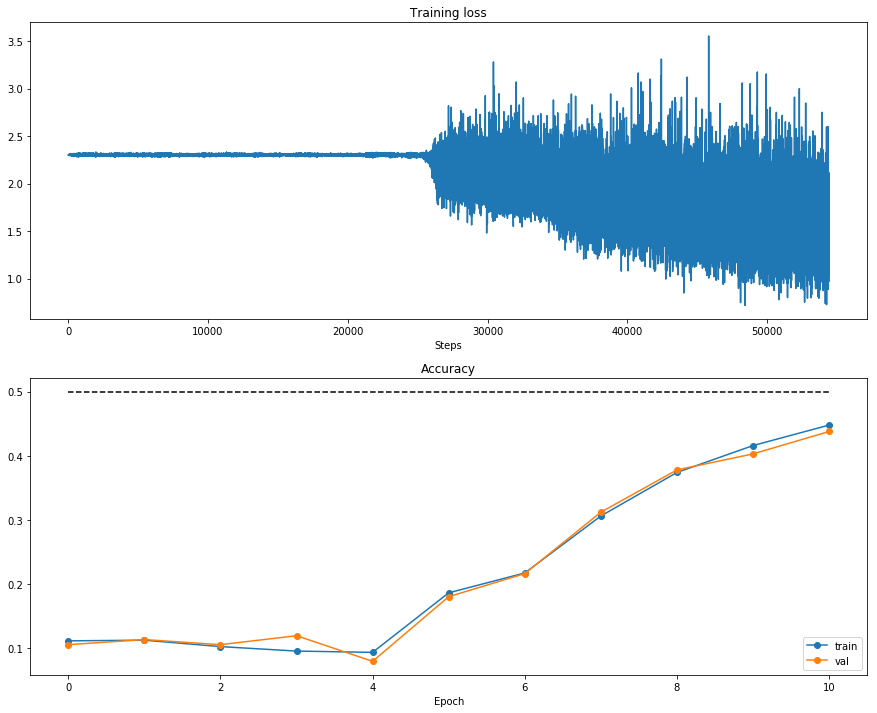

In [20]:
model = net.FCNet(
    hidden_dims=[100, 100],
    init_scale=0.001, init_mode="normal"
)
solver = None

######################################################################
# TODO: Use the same solver settings that used when training         #
# TwoLayerNet model                                                  #
######################################################################
solver = Solver(
                model, 
                data,
                optim_config={
                    'lr':0.01,
                },
                lr_decay=0.95,
                num_epochs=10, 
                batch_size=9)
######################################################################
#                          END OF YOUR CODE                          #
######################################################################
solver.train()

# plot results
plt.subplot(2, 1, 1)
plt.title("Training loss")
plt.plot(solver.loss_history, "-")
plt.xlabel("Steps")

plt.subplot(2, 1, 2)
plt.title("Accuracy")
plt.plot(solver.train_acc_history, "-o", label="train")
plt.plot(solver.val_acc_history, "-o", label="val")
plt.plot([0.5] * len(solver.val_acc_history), "k--")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.gcf().set_size_inches(15, 12)
plt.show()

# Better initialization
지금까지는 네트워크의 weight를 std=0.001인 가우시안 분포를 사용하여 초기화 하였다 (`nn/init.py`의 `_normal_init` 함수 참조). 하지만 이 초기화 방법은 위와 같이 레이어를 깊게 쌓은 경우 성능을 올리기가 매우 어렵다는 단점이 있다. 이를 해결하고자 Xavier [1], He [2] 초기화 방법이 제안되었다.<br>
아래 코드를 실행시켜보고 문제에 대해 답을 서술해보자.

[1] Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks." ICAIS 2010.<br>
[2] He, Kaiming, et al. "Delving deep into rectifiers: Surpassing human-level performance on imagenet classification." ICCV 2015.

## Question:
1. std=0.001인 가우시안 분포로 네트워크의 weight를 초기화한 모델의 학습이 되지 않는 이유가 무엇일까?
2. He 초기화 방법은 가우시안 분포 초기화 어떤 장점을 가지고 있을까?

## Answer:
1. normal_init 코드를 보면 초기화한 배열에 단순히 scale(0.001)을 곱해준다. 이 weight로 학습을 할 경우 모든 출력 값이 0에 가까워지므로 backdrop단계에서 파라미터를 업데이트하기 힘들어진다. 그로 인해 학습이 잘 안되는 것이다. 
2. input의 절반을 sqrt해주게 되므로 ReLU에서 좋은 결과를 낸다.(ReLu는 x가 0보다 작을 때 값을 0으로 만들어주기 때문에)

Epoch 0/10
  Loss: 2.485
  Train accuracy: 0.100
  Val accuracy: 0.082
Epoch 1/10
  Loss: 1.768
  Train accuracy: 0.481
  Val accuracy: 0.456
Epoch 2/10
  Loss: 1.230
  Train accuracy: 0.528
  Val accuracy: 0.473
Epoch 3/10
  Loss: 1.438
  Train accuracy: 0.543
  Val accuracy: 0.508
Epoch 4/10
  Loss: 0.536
  Train accuracy: 0.557
  Val accuracy: 0.507
Epoch 5/10
  Loss: 1.094
  Train accuracy: 0.588
  Val accuracy: 0.528
Epoch 6/10
  Loss: 1.113
  Train accuracy: 0.606
  Val accuracy: 0.521
Epoch 7/10
  Loss: 1.133
  Train accuracy: 0.634
  Val accuracy: 0.530
Epoch 8/10
  Loss: 0.758
  Train accuracy: 0.602
  Val accuracy: 0.514
Epoch 9/10
  Loss: 0.781
  Train accuracy: 0.613
  Val accuracy: 0.524
Epoch 10/10
  Loss: 0.830
  Train accuracy: 0.666
  Val accuracy: 0.528


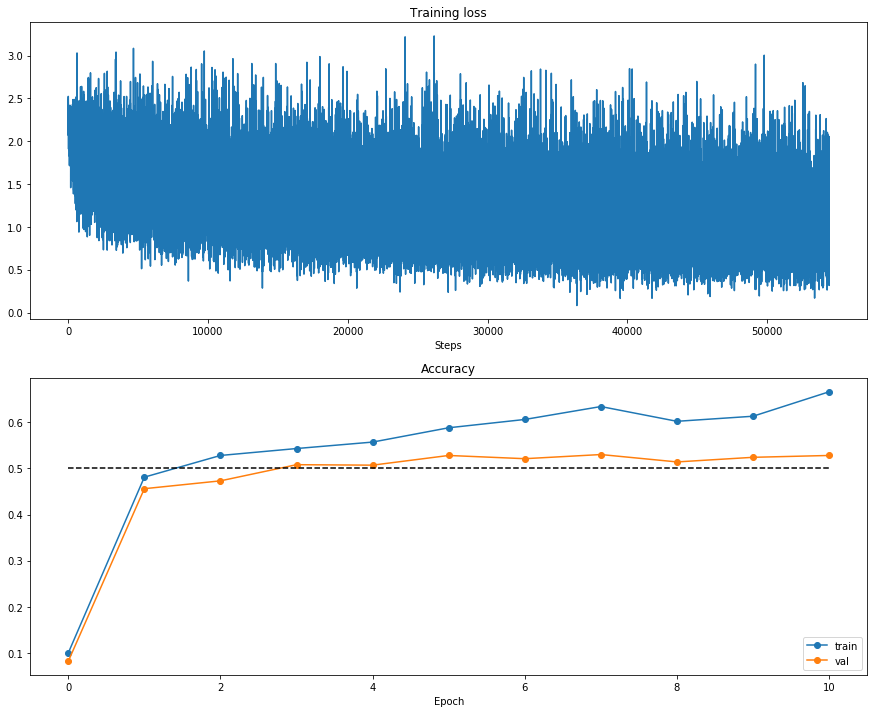

In [21]:
model = net.FCNet(
    hidden_dims=[100, 100],
    init_mode="he" # or use xavier
)
solver = None

######################################################################
# TODO: Use the same solver settings that used when training         #
# TwoLayerNet model                                                  #
######################################################################
solver = Solver(
                model, 
                data,
                optim_config={
                    'lr':0.01
                },
                lr_decay=0.95,
                num_epochs=10, 
                batch_size=9)
######################################################################
#                          END OF YOUR CODE                          #
######################################################################
solver.train()

# plot results
plt.subplot(2, 1, 1)
plt.title("Training loss")
plt.plot(solver.loss_history, "-")
plt.xlabel("Steps")

plt.subplot(2, 1, 2)
plt.title("Accuracy")
plt.plot(solver.train_acc_history, "-o", label="train")
plt.plot(solver.val_acc_history, "-o", label="val")
plt.plot([0.5] * len(solver.val_acc_history), "k--")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.gcf().set_size_inches(15, 12)
plt.show()